<a href="https://colab.research.google.com/github/rb05751/Image-Generator/blob/master/Reverse_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
# To generate GIFs
!pip install -q imageio
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.mnist.load_data()

# (training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.fashion_mnist.load_data()

# (training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.cifar10.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
8


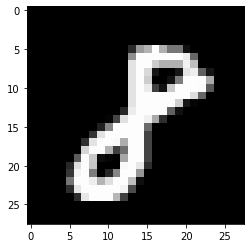

In [4]:
image = training_images[31, :]
label = training_labels[31]
# image = image.reshape(28,28,1)
plt.imshow(image[:, :], cmap='gray')
# plt.imshow(image)

print(training_images.shape)
print(label)

In [6]:
train_images = training_images / 255
train_images = train_images[:,:,:]
train_images = train_images.reshape(train_images.shape[0], 784)
train_labels = training_labels
validation_images = testing_images
validation_images = validation_images[:,:,:]
validation_images = validation_images.reshape(validation_images.shape[0], 784) / 255
validation_labels = testing_labels

print(train_images.shape)
print(validation_images.shape)
print(train_labels.shape)
print(validation_labels.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [8]:


model = tf.keras.Sequential([
      #Upsampling portion of model
      tf.keras.layers.Dense(2*2*256, activation = 'relu', input_shape = (1,)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(7*7*256, activation = 'relu', input_shape = (1,)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Reshape((7, 7, 256)),
      tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), activation = 'relu', padding='same', use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same',  use_bias=False, activation = 'tanh'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(784, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_3 (Dense)              (None, 12544)             12857600  
_________________________________________________________________
batch_normalization_3 (Batch (None, 12544)             50176     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 256)       589824    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 256)      

In [9]:
# Compile Model. 
model.compile(loss = 'categorical_crossentropy'
    , optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit(x = train_labels, y = train_images, batch_size = 1000, epochs=10, validation_data = (validation_labels, validation_images), verbose = 1, validation_steps = 1)

model.evaluate(validation_labels, validation_images)

Epoch 1/10
60/60 [==============================] - 7s 124ms/step - loss: 598.1104 - accuracy: 0.0043 - val_loss: 562.7945 - val_accuracy: 0.0080
Epoch 2/10
60/60 [==============================] - 7s 123ms/step - loss: 580.4356 - accuracy: 0.0041 - val_loss: 568.8880 - val_accuracy: 0.0020
Epoch 3/10
60/60 [==============================] - 7s 122ms/step - loss: 577.8918 - accuracy: 0.0049 - val_loss: 576.2350 - val_accuracy: 0.0020
Epoch 4/10
60/60 [==============================] - 7s 123ms/step - loss: 577.0852 - accuracy: 0.0047 - val_loss: 576.4035 - val_accuracy: 0.0130
Epoch 5/10
60/60 [==============================] - 7s 123ms/step - loss: 576.7742 - accuracy: 0.0035 - val_loss: 574.7922 - val_accuracy: 0.0110
Epoch 6/10
60/60 [==============================] - 7s 124ms/step - loss: 576.6307 - accuracy: 0.0037 - val_loss: 571.1460 - val_accuracy: 0.0090
Epoch 7/10
60/60 [==============================] - 8s 128ms/step - loss: 576.5576 - accuracy: 0.0053 - val_loss: 580.1588 -

[584.8748779296875, 0.003000000026077032]

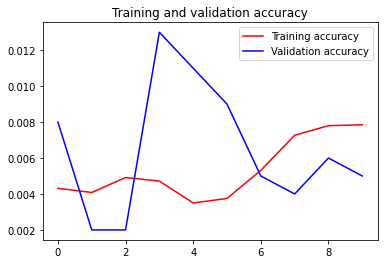

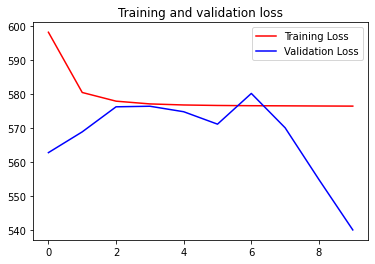

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))



plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

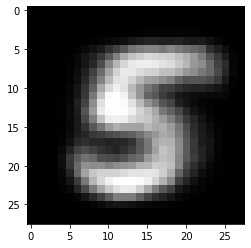

In [12]:
prediction_og = model.predict([5]) #Give the model the number 5
prediction = prediction_og.reshape(28,28) #reshape into a 28,28 array
plt.imshow(prediction[:, :], cmap='gray') #show it as an image

#This is the models generated image of a 5

0.21405874
0.29540476
0.7802073661077543


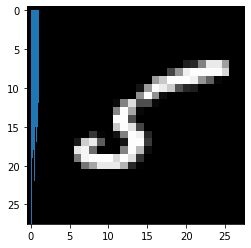

In [30]:
#calculate mean and stdev of pixel values generated by model
print(np.mean(prediction_og))
print(np.std(prediction_og))

#compare them to the original image
print(np.std(train_images[11])/np.std(prediction_og))
plt.imshow(training_images[11], cmap='gray')

#This is what a single 5 looks like in the handwritten digits dataset.